In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from yellowbrick.cluster import SilhouetteVisualizer

In [12]:
# Hàm tiền xử lý ảnh
def preprocess_image(image_path):
    # Đọc ảnh từ đường dẫn
    image = imread(image_path)
    
    # Xử lý ngoại lệ: Kiểm tra nếu ảnh là ảnh đen trắng
    if len(image.shape) == 2:  # Kích thước là (height, width)
        # Chuyển đổi ảnh đen trắng thành ảnh RGB
        image = np.stack((image,)*3, axis=-1)  # Sao chép giá trị grayscale sang 3 kênh R, G, B
    
    # Chuyển đổi ảnh thành mảng 2 chiều và chuẩn hóa giá trị về [0, 1]
    height, width, channels = image.shape
    X = image.reshape(-1, channels) / 255.0  # Chuẩn hóa các giá trị pixel
    
    return image, X, height, width

In [13]:
# Hàm phân cụm và thay màu của các pixel theo cụm
def apply_kmeans(X, K):
    kmeans = KMeans(n_clusters=K,init='k-means++',n_init=1, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return labels, centroids


In [14]:
# Hàm tạo lại ảnh từ các cụm màu
def recreate_image(labels, centroids, height, width):
    # Tạo ảnh nén từ các tâm cụm
    compressed_image = centroids[labels].reshape(height, width, -1)
    return (compressed_image * 255).astype(np.uint8)  # Chuyển về [0, 255] để hiển thị ảnh


In [15]:
# Hàm hiển thị ảnh gốc và các ảnh phân cụm với nhiều K khác nhau
def display_segmented_images(image, X, height, width, n_clusters_list):
    segmented_imgs = []
    
    # Phân cụm ảnh với các giá trị K khác nhau và lưu lại ảnh phân cụm
    for K in n_clusters_list:
        labels, centroids = apply_kmeans(X, K)
        segmented_img = recreate_image(labels, centroids, height, width)
        segmented_imgs.append(segmented_img)
    
    # Tạo kích thước lớn hơn và hiển thị ảnh gốc cùng các ảnh phân cụm
    plt.figure(figsize=(15, 10))
    
    # Hiển thị ảnh gốc ở vị trí đầu tiên
    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    
    # Hiển thị các ảnh phân cụm với các giá trị K khác nhau
    for idx, K in enumerate(n_clusters_list):
        plt.subplot(2, 3, idx + 2)
        plt.imshow(segmented_imgs[idx])
        plt.title(f"{K} colors")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [16]:
# Hàm Elbow Method để tìm số cụm tối ưu
def elbow_method(X):
    inertia_values = []
    K_values = range(2, 11)
    
    # Tính Inertia cho các giá trị K từ 2 đến 10
    for K in K_values:
        kmeans = KMeans(n_clusters=K, init='k-means++', n_init=1, random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)
    
    # Sử dụng Kneed để tìm điểm khuỷu tay
    kneedle = KneeLocator(K_values, inertia_values, curve="convex", direction="decreasing")
    elbow_index = kneedle.elbow  # Lấy số cụm tối ưu (điểm khuỷu tay)
    
    # Vẽ đồ thị Elbow Method với điểm khuỷu tay
    plt.figure(figsize=(8, 5))
    plt.plot(K_values, inertia_values, 'bo-')
    plt.axvline(x=elbow_index, color='r', linestyle='--', label=f'Optimal K: {elbow_index}')
    plt.xlabel('Số cụm K')
    plt.ylabel('Inertia')
    plt.title("Elbow Method")
    plt.legend()
    plt.show()
    
    print(f"The optimal K by Elbow Method is: {elbow_index}")
    return elbow_index

In [17]:
# Chạy toàn bộ project
def main(image_path):
    # Bước 1: Tiền xử lý
    image, X, height, width = preprocess_image(image_path)
    
    # Bước 2: Phân đoạn hình ảnh với một vài giá trị K để thể hiện thuật toán
    n_clusters_list = [10, 8 , 6, 4, 2]  # Các giá trị K để thử nghiệm
    display_segmented_images(image, X, height, width, n_clusters_list)

    return X

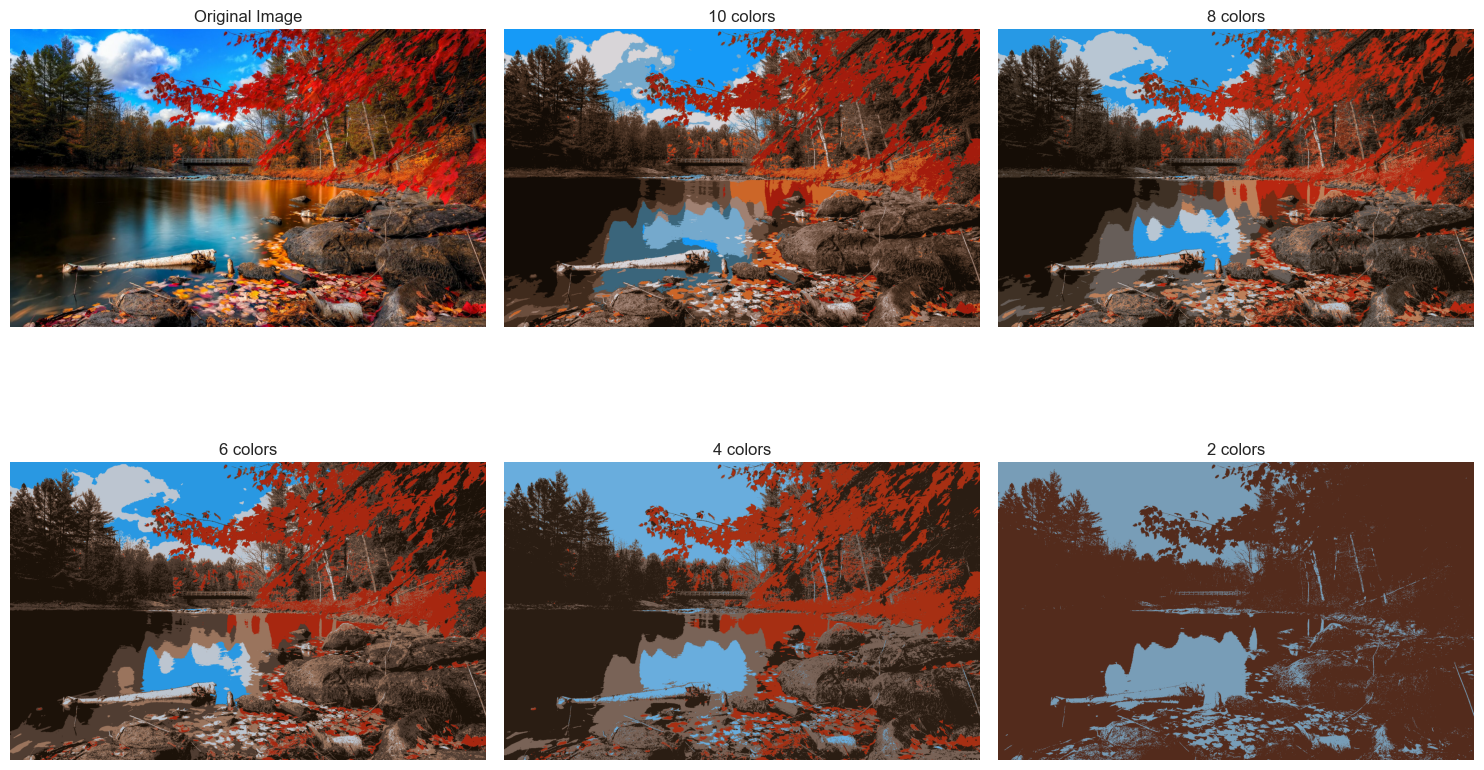

In [19]:
image_path1 = '../images/test1.jpg'
X = main(image_path1)

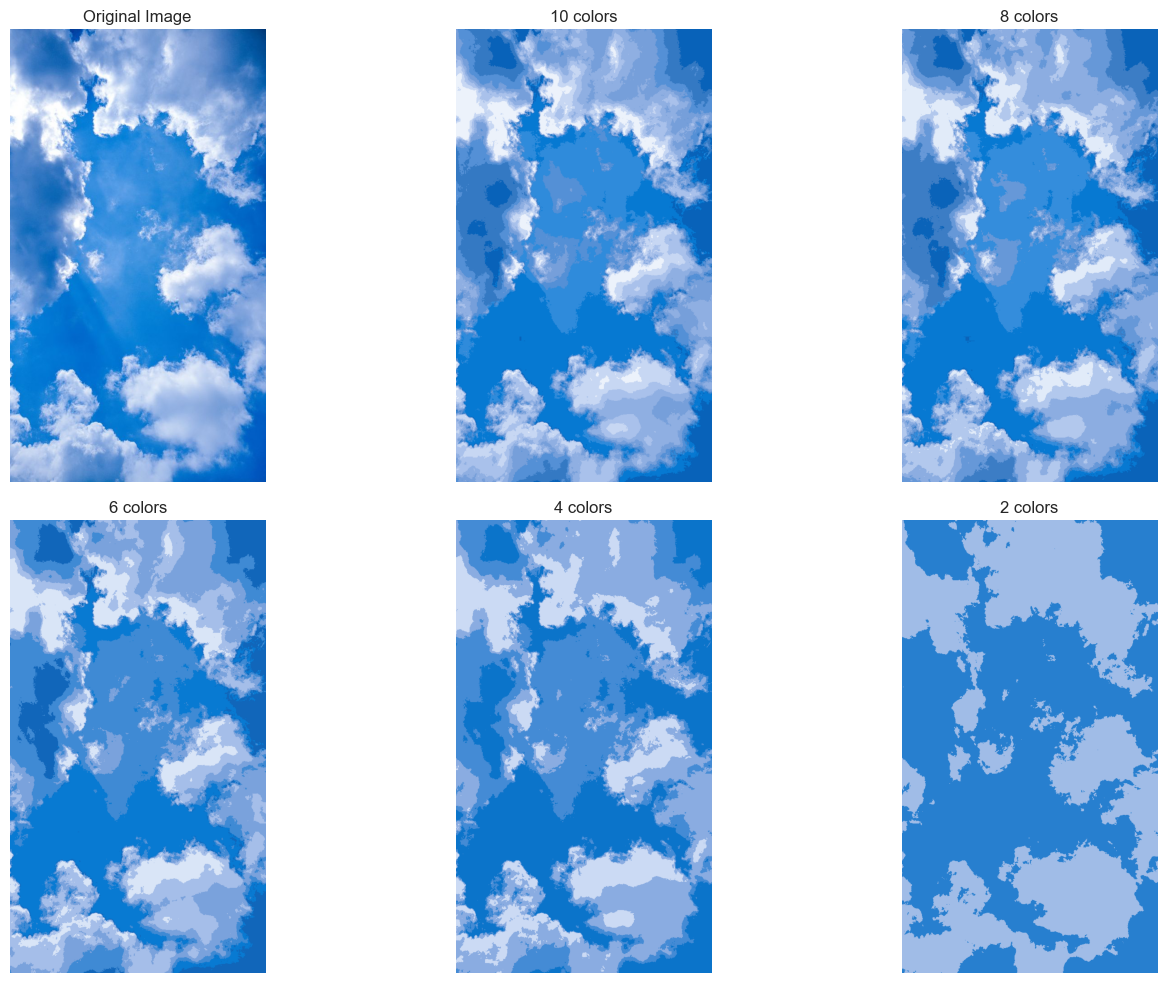

In [22]:
image_path2 = '../images/test2.jpg'
X = main(image_path2)


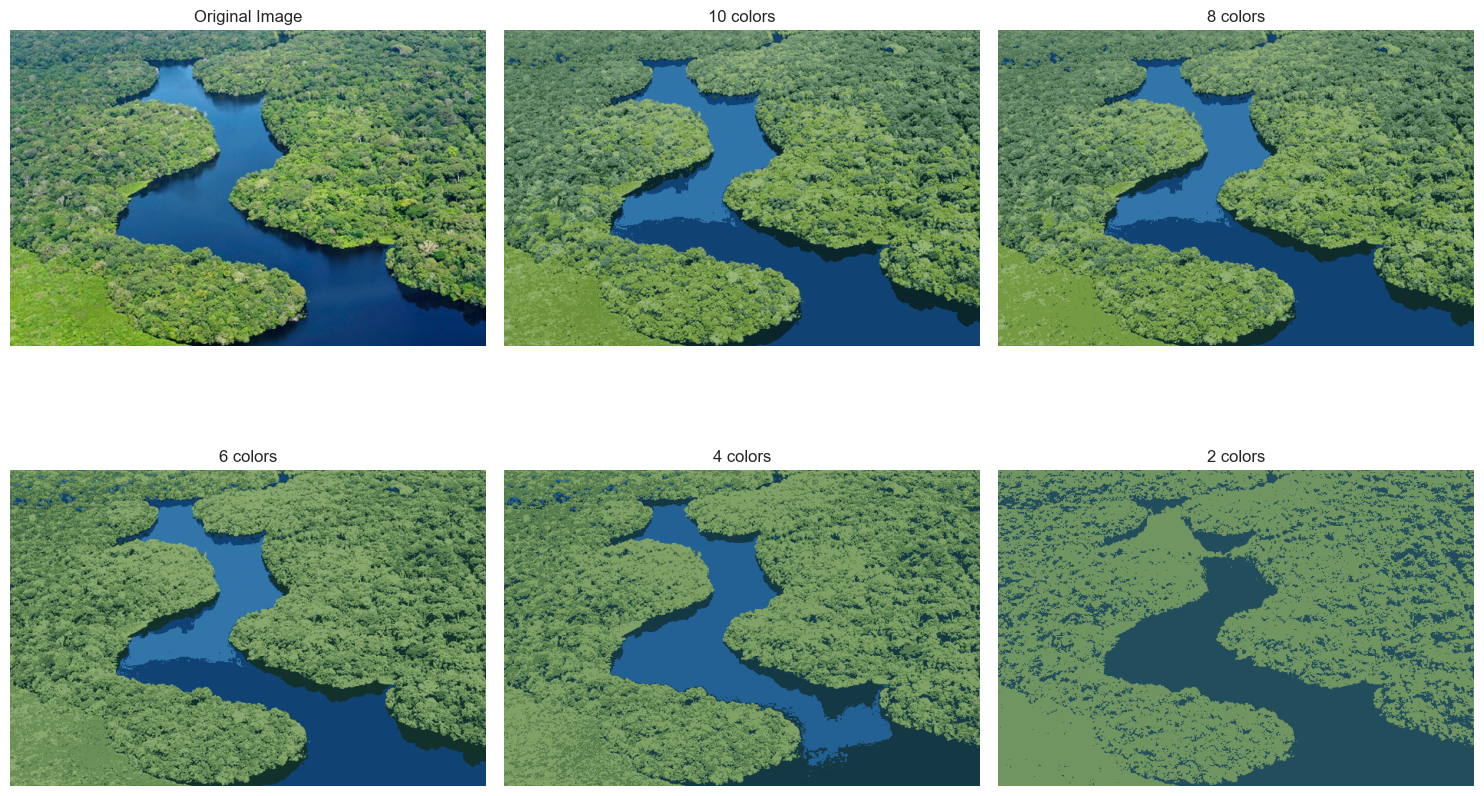

In [23]:
image_path3 = '../images/test3.jpg'
X = main(image_path3)


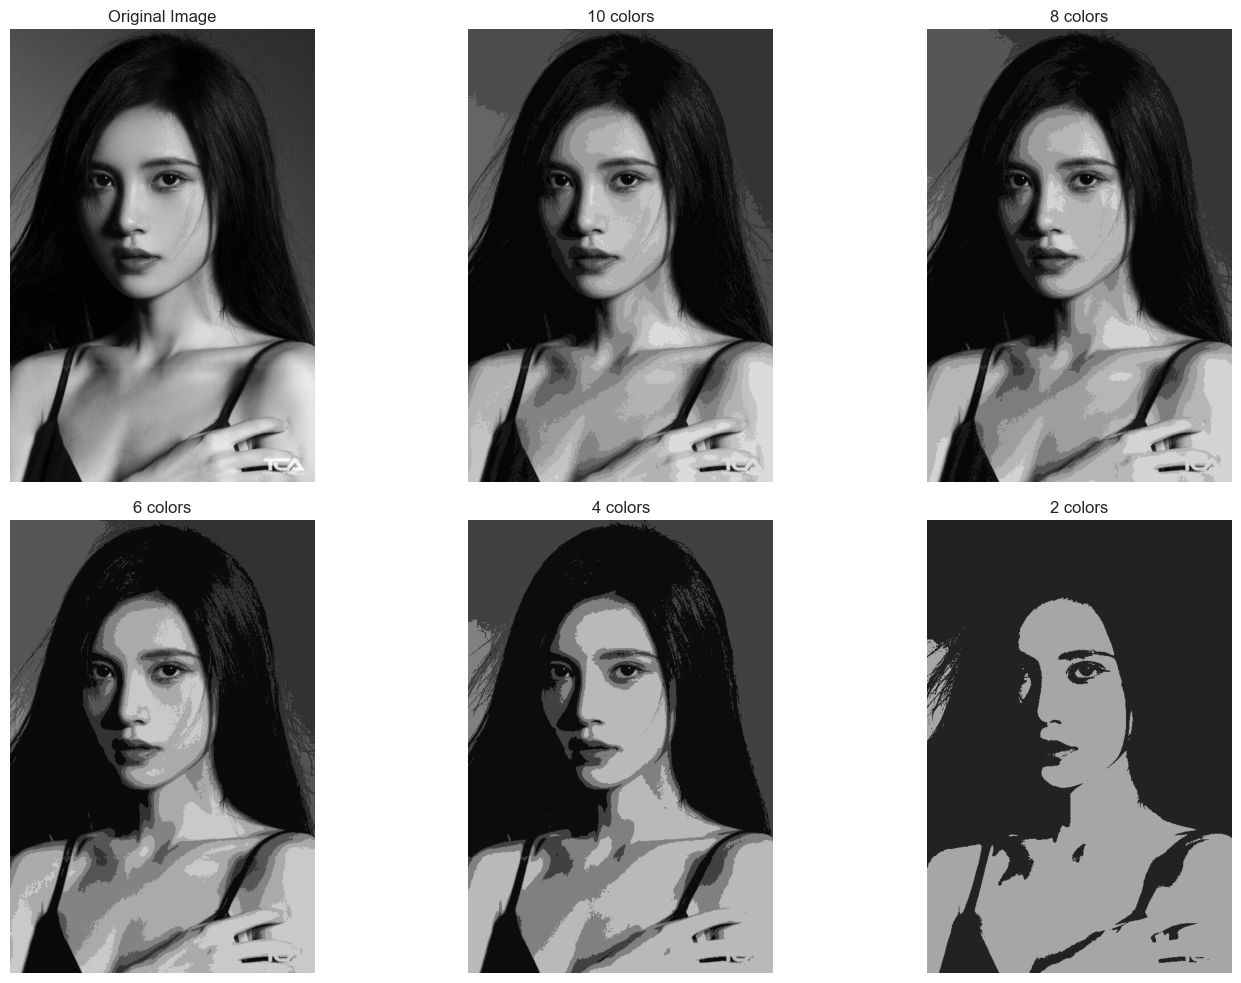

In [24]:
image_path4 = '../images/blackwhite.jpg' 
X = main(image_path4)

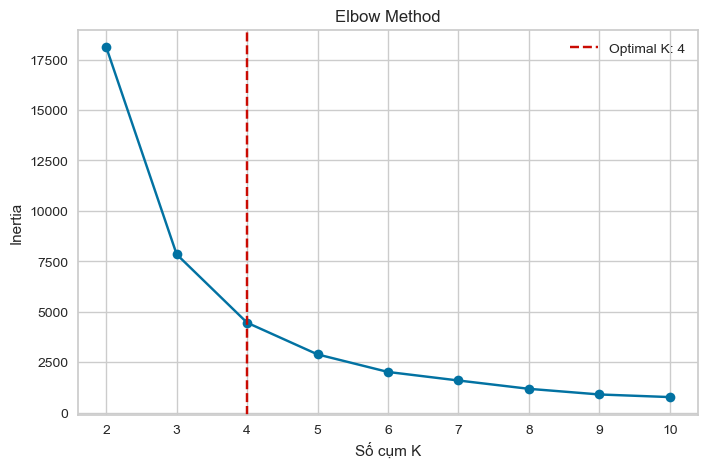

The optimal K by Elbow Method is: 4


In [25]:
optimal_k = elbow_method(X)